# Nashville Housing Cleaning and Correlation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv(r"C:\Users\fredd\OneDrive\Documents\Data Analyst\Portfolio\Cleaning data python\Nashville Housing Data for Data Cleaning (updated).csv")

## Cleaning

In [3]:
df #Check dataset

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

Change YearBuilt to a string

In [5]:
df["YearBuilt"] = df["YearBuilt"].astype(str).apply(lambda x: x.replace('.0',''))

In [6]:
df.columns #Column names

Index(['UniqueID ', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [7]:
df["UniqueID "] = df["UniqueID "].astype(str) # Converting UniqueID to string type

Rename Unique ID column to remove the unwanted space

In [8]:
df = df.rename(columns={'UniqueID ': 'UniqueID'})

Make UniqueID the index

In [9]:
df = df.set_index("UniqueID")

Dropping Duplicates

In [10]:
df.drop_duplicates()

,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,,,,,,,
2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986,3.0,3.0,0.0
16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998,3.0,3.0,2.0
54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987,4.0,3.0,0.0
43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985,3.0,3.0,0.0
22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN


102 rows were removed

Change SaleDate column to date type and split it into different columns

Change to Datetime

In [11]:
df["SaleDate"] = pd.to_datetime(df["SaleDate"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56477 entries, 2045 to 54043
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ParcelID         56477 non-null  object        
 1   LandUse          56477 non-null  object        
 2   PropertyAddress  56448 non-null  object        
 3   SaleDate         56477 non-null  datetime64[ns]
 4   SalePrice        56477 non-null  object        
 5   LegalReference   56477 non-null  object        
 6   SoldAsVacant     56477 non-null  object        
 7   OwnerName        25261 non-null  object        
 8   OwnerAddress     26015 non-null  object        
 9   Acreage          26015 non-null  float64       
 10  TaxDistrict      26015 non-null  object        
 11  LandValue        26015 non-null  float64       
 12  BuildingValue    26015 non-null  float64       
 13  TotalValue       26015 non-null  float64       
 14  YearBuilt        56477 non-null  object 

In [13]:
df

,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,,,,,,,
2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986,3.0,3.0,0.0
16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998,3.0,3.0,2.0
54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987,4.0,3.0,0.0
43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985,3.0,3.0,0.0
22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN


In [14]:
df['SaleDate'] = df['SaleDate'].astype(str) #Change 'SaleDate' to string type

Split SaleDate column into day, month and year columns

In [15]:
df[['SaleYear', 'SaleMonth', 'SaleDay']] = df['SaleDate'].str.split('-', expand=True)

In [16]:
df["SaleDate"] = pd.to_datetime(df["SaleDate"])

Split "Owner Address" and "Property Address" into different columns

In [17]:
df[["OwnerStreet", "OwnerCity", "OwnerState"]] = df["OwnerAddress"].str.split(',', 2, expand=True)

In [18]:
df[df['PropertyAddress'].isnull()]

,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleYear,SaleMonth,SaleDay,OwnerStreet,OwnerCity,OwnerState
UniqueID,,,,,,,,,,,,,,,,,,,,,
43076,025 07 0 031.00,SINGLE FAMILY,NaN,2016-01-15,179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN","410 ROSEHILL CT, GOODLETTSVILLE, TN",0.96,...,1964,3.0,1.0,0.0,2016,01,15,410 ROSEHILL CT,GOODLETTSVILLE,TN
39432,026 01 0 069.00,VACANT RESIDENTIAL LAND,NaN,2015-10-23,153000,20151028-0109602,No,"SHACKLEFORD, MICHAEL C., JR.","141 TWO MILE PIKE, GOODLETTSVILLE, TN",0.17,...,2015,3.0,2.0,0.0,2015,10,23,141 TWO MILE PIKE,GOODLETTSVILLE,TN
45290,026 05 0 017.00,SINGLE FAMILY,NaN,2016-03-29,155000,20160330-0029941,No,"TRIPP, MARVIN S. & DEBORAH YOUNG","208 EAST AVE, GOODLETTSVILLE, TN",0.20,...,2008,3.0,2.0,0.0,2016,03,29,208 EAST AVE,GOODLETTSVILLE,TN
53147,026 06 0A 038.00,RESIDENTIAL CONDO,NaN,2016-08-25,144900,20160831-0091567,No,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,2016,08,25,NaN,NaN,NaN
43080,033 06 0 041.00,SINGLE FAMILY,NaN,2016-01-04,170000,20160107-0001526,No,"FRANK, ZACHARY & NIKI","1129 CAMPBELL RD, GOODLETTSVILLE, TN",0.24,...,2000,3.0,2.0,0.0,2016,01,04,1129 CAMPBELL RD,GOODLETTSVILLE,TN
45295,033 06 0A 002.00,SINGLE FAMILY,NaN,2016-03-29,210000,20160331-0030709,No,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,2016,03,29,NaN,NaN,NaN
48731,033 15 0 123.00,SINGLE FAMILY,NaN,2016-05-05,199900,20160506-0045368,No,"COLEMAN, AARON A. & CECIL, CORRIE J.","438 W CAMPBELL RD, GOODLETTSVILLE, TN",1.39,...,1954,2.0,1.0,0.0,2016,05,05,438 W CAMPBELL RD,GOODLETTSVILLE,TN
36531,034 03 0 059.00,SINGLE FAMILY,NaN,2015-08-13,245000,20150819-0083759,No,"DILICK, JOHN MARK & ANNETTE A.","2117 PAULA DR, MADISON, TN",1.01,...,1964,4.0,3.0,0.0,2015,08,13,2117 PAULA DR,MADISON,TN
46919,034 07 0B 015.00,VACANT RESIDENTIAL LAND,NaN,2016-04-27,40000,20160304-0020905,Yes,NaN,NaN,NaN,...,nan,NaN,NaN,NaN,2016,04,27,NaN,NaN,NaN


29 Rows have no property address

Populate property address with owner address

In [19]:
df['PropertyAddress'] = df['OwnerAddress']

Split Property address into multiple columns

In [20]:
df[["PropertyStreet", "PropertyCity", "PropertyState"]] = df["PropertyAddress"].str.split(',', 2, expand=True)

In [21]:
df

,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,...,HalfBath,SaleYear,SaleMonth,SaleDay,OwnerStreet,OwnerCity,OwnerState,PropertyStreet,PropertyCity,PropertyState
UniqueID,,,,,,,,,,,,,,,,,,,,,
2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE, TN",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,...,0.0,2013,04,09,1808 FOX CHASE DR,GOODLETTSVILLE,TN,1808 FOX CHASE DR,GOODLETTSVILLE,TN
16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE, TN",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,...,2.0,2014,06,10,1832 FOX CHASE DR,GOODLETTSVILLE,TN,1832 FOX CHASE DR,GOODLETTSVILLE,TN
54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE, TN",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,...,0.0,2016,09,26,1864 FOX CHASE DR,GOODLETTSVILLE,TN,1864 FOX CHASE DR,GOODLETTSVILLE,TN
43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE, TN",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,...,0.0,2016,01,29,1853 FOX CHASE DR,GOODLETTSVILLE,TN,1853 FOX CHASE DR,GOODLETTSVILLE,TN
22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE, TN",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,...,0.0,2014,10,10,1829 FOX CHASE DR,GOODLETTSVILLE,TN,1829 FOX CHASE DR,GOODLETTSVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,188 10 0A 101.00,SINGLE FAMILY,NaN,2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,...,NaN,2015,05,27,NaN,NaN,NaN,NaN,NaN,NaN
27707,188 10 0A 107.00,SINGLE FAMILY,NaN,2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,...,NaN,2015,03,02,NaN,NaN,NaN,NaN,NaN,NaN
52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,NaN,2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,...,NaN,2016,08,16,NaN,NaN,NaN,NaN,NaN,NaN


Standardise columns

In [22]:
df['SoldAsVacant'].unique()

array(['No', 'N', 'Yes', 'Y'], dtype=object)

Standardarise 'SoldAsVacant' column

In [23]:
df['SoldAsVacant'] = df['SoldAsVacant'].replace(['N', 'Y'], ['No', 'Yes'])

In [24]:
df['SoldAsVacant'].unique()

array(['No', 'Yes'], dtype=object)

'SoldAsVacant' column standardised

Remove Duplicates

In [25]:
print(f"there are {df.duplicated().sum()} duplicates")

there are 103 duplicates


In [26]:
df = df.drop_duplicates()

In [27]:
print(f"there are {df.duplicated().sum()} duplicates")

there are 0 duplicates


Drop unused columns

In [28]:
df.columns

Index(['ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice',
       'LegalReference', 'SoldAsVacant', 'OwnerName', 'OwnerAddress',
       'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue', 'TotalValue',
       'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath', 'SaleYear',
       'SaleMonth', 'SaleDay', 'OwnerStreet', 'OwnerCity', 'OwnerState',
       'PropertyStreet', 'PropertyCity', 'PropertyState'],
      dtype='object')

In [29]:
df = df.drop(['PropertyAddress', 'OwnerAddress', 'TaxDistrict'], axis=1)

## Correlations

Create correlation matrix

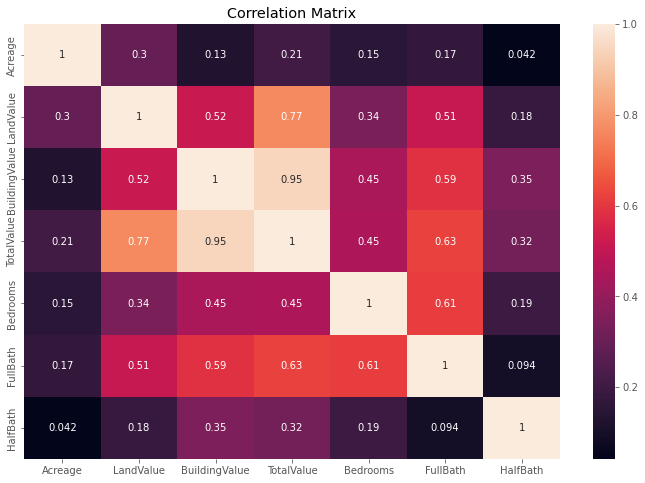

In [45]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

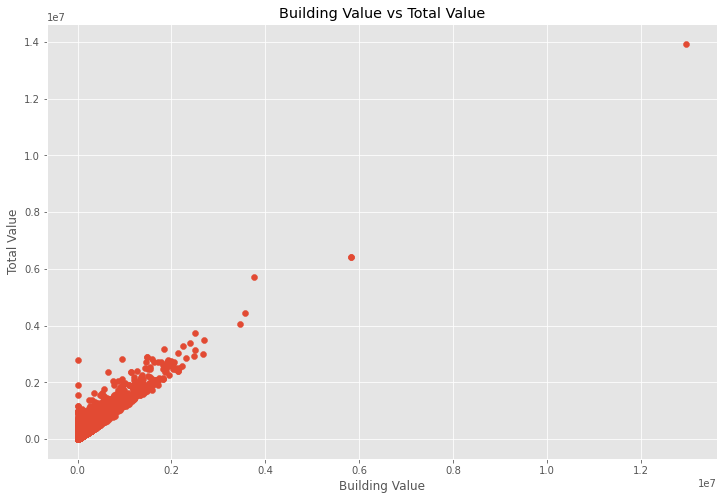

In [31]:
# Scatter plot for building value vs total value

plt.scatter(x=df['BuildingValue'], y=df['TotalValue'])

plt.title('Building Value vs Total Value')

plt.xlabel('Building Value')

plt.ylabel('Total Value')

plt.show()

Get a better view of the data by eliminating outlier

In [32]:
df['BuildingValue'].max()

12971800.0

In [33]:
df_filtered = df[(df['BuildingValue'] < 12971800.0)]

In [34]:
df_filtered['BuildingValue'].max()

5824300.0

New scatterplot

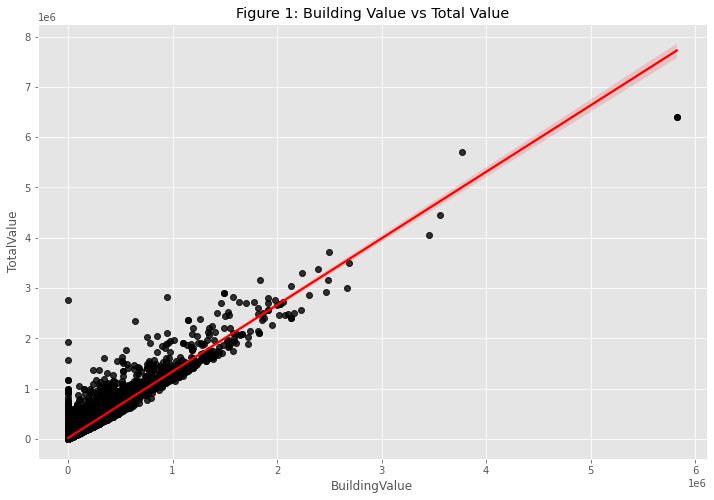

In [44]:
ax = sns.regplot(x='BuildingValue', y='TotalValue', data=df_filtered, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set_title('Figure 1: Building Value vs Total Value')

plt.show()

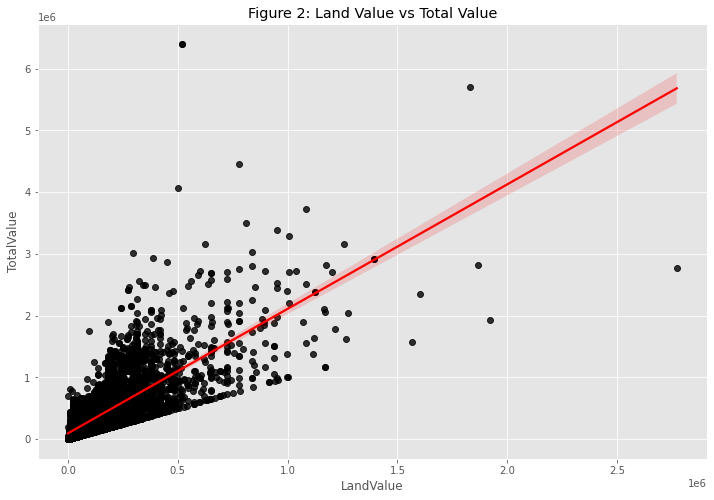

In [51]:
ax = sns.regplot(x='LandValue', y='TotalValue', data=df_filtered, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set_title('Figure 2: Land Value vs Total Value')

plt.show()

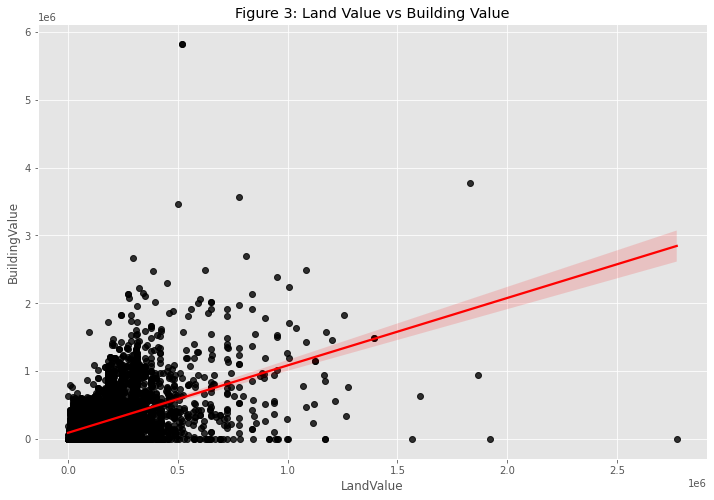

In [50]:
ax = sns.regplot(x='LandValue', y='BuildingValue', data=df_filtered, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set_title('Figure 3: Land Value vs Building Value')

plt.show()

Figure 3 shows that there are plenty of buildings that don't have a value yet have a land value of over 0.  This could mean that there are buildings that have been planned to be built on land in the future.